In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
)

train_dataloader = DataLoader(training_data, batch_size = 64)
test_dataloader = DataLoader(test_data, batch_size = 64)

class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28 * 28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)

    return logits

model = NeuralNetwork()

print(model)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


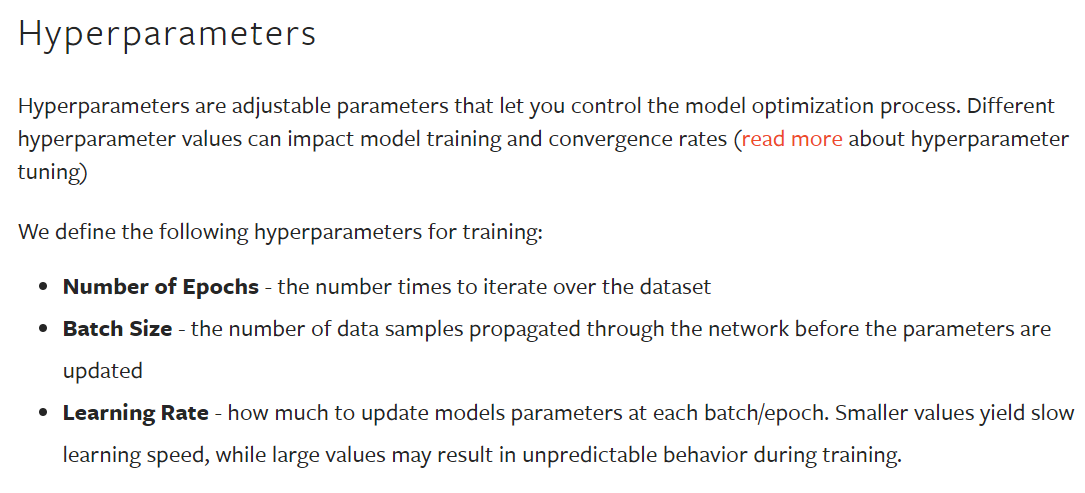

In [3]:
# Hyperparameters
learning_rate = 1e-3
batch_size = 64
epoch = 5

In [4]:
# Initialize the loss function
"""
Common loss functions include nn.MSELoss (Mean Square Error) for regression tasks, 
and nn.NLLLoss (Negative Log Likelihood) for classification. 
nn.CrossEntropyLoss combines nn.LogSoftmax and nn.NLLLoss.
"""
loss_fn = nn.CrossEntropyLoss()

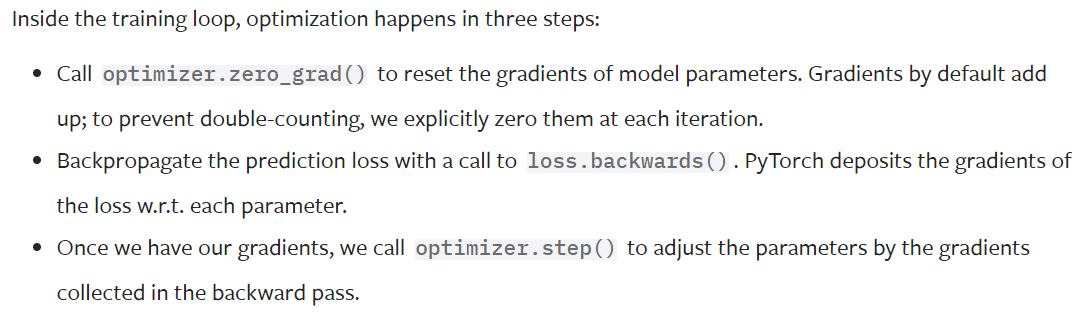

In [5]:
# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [6]:
# Full Implementation
def train_loop(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)

  # batch: index of dataloader
  for batch, (X, y) in enumerate(dataloader):
    # compute prediction loss
    pred = model(X)
    loss = loss_fn(pred, y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current = loss.item(), batch * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)

  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, y in dataloader:
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [7]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301200  [    0/60000]
loss: 2.292868  [ 6400/60000]
loss: 2.274902  [12800/60000]
loss: 2.263739  [19200/60000]
loss: 2.244799  [25600/60000]
loss: 2.221573  [32000/60000]
loss: 2.224782  [38400/60000]
loss: 2.191055  [44800/60000]
loss: 2.193801  [51200/60000]
loss: 2.164573  [57600/60000]
Test Error: 
 Accuracy: 47.3%, Avg loss: 2.152511 

Epoch 2
-------------------------------
loss: 2.165281  [    0/60000]
loss: 2.152800  [ 6400/60000]
loss: 2.094569  [12800/60000]
loss: 2.100037  [19200/60000]
loss: 2.051162  [25600/60000]
loss: 2.002566  [32000/60000]
loss: 2.025574  [38400/60000]
loss: 1.947844  [44800/60000]
loss: 1.953698  [51200/60000]
loss: 1.884460  [57600/60000]
Test Error: 
 Accuracy: 53.5%, Avg loss: 1.870109 

Epoch 3
-------------------------------
loss: 1.912670  [    0/60000]
loss: 1.874958  [ 6400/60000]
loss: 1.755705  [12800/60000]
loss: 1.783226  [19200/60000]
loss: 1.680469  [25600/60000]
loss: 1.641521  [32000/600